In [170]:
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from datetime import datetime
rcParams['figure.figsize'] = 25, 6

In [110]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [111]:
data = pd.read_excel ("ДЗ6.xlsx", index_col=0)
data['index1'] = data.index

In [112]:
data["Значение"].value_counts()

1     605
0     190
2     148
5     138
3     120
8      79
9      53
4      44
7      39
6      33
10     12
Name: Значение, dtype: int64

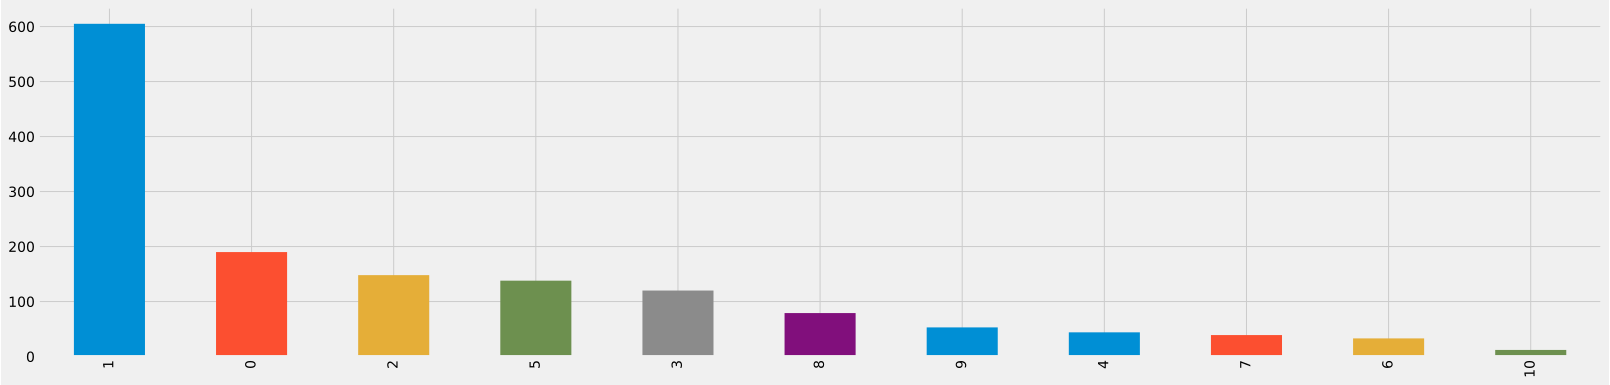

In [171]:
data["Значение"].value_counts().plot(kind ="bar", logy=False)
plt.show()

# Как мы видим, значения распределены крайне неравномерно, значений 1 намного больше остальных, 10 - практически не встречается. 

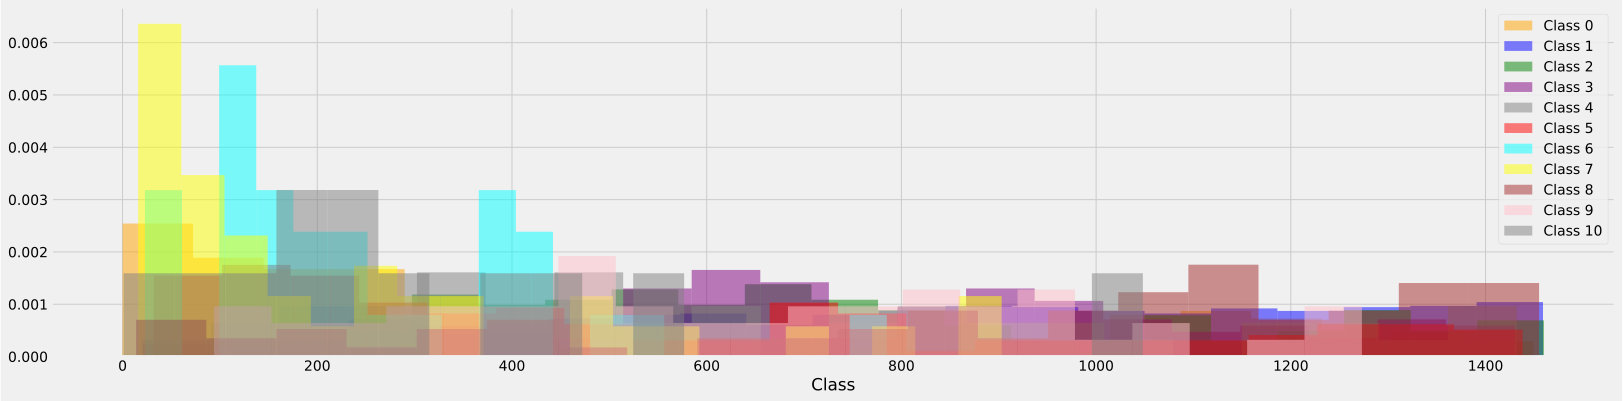

In [173]:
plt.hist(data.loc[data["Значение"] == 0,"index1"], bins = 20, density = True, alpha = 0.5, color = "orange", label = "Class 0")
plt.hist(data.loc[data["Значение"] == 1,"index1"], bins = 20, density = True, alpha = 0.5, color = "blue", label = "Class 1")
plt.hist(data.loc[data["Значение"] == 2,"index1"], bins = 20, density = True, alpha = 0.5, color = "green", label = "Class 2")
plt.hist(data.loc[data["Значение"] == 3,"index1"], bins = 20, density = True, alpha = 0.5, color = "purple", label = "Class 3")
plt.hist(data.loc[data["Значение"] == 4,"index1"], bins = 20, density = True, alpha = 0.5, color = "gray", label = "Class 4")
plt.hist(data.loc[data["Значение"] == 5,"index1"], bins = 20, density = True, alpha = 0.5, color = "red", label = "Class 5")
plt.hist(data.loc[data["Значение"] == 6,"index1"], bins = 20, density = True, alpha = 0.5, color = "cyan", label = "Class 6")
plt.hist(data.loc[data["Значение"] == 7,"index1"], bins = 20, density = True, alpha = 0.5, color = "yellow", label = "Class 7")
plt.hist(data.loc[data["Значение"] == 8,"index1"], bins = 20, density = True, alpha = 0.5, color = "brown", label = "Class 8")
plt.hist(data.loc[data["Значение"] == 9,"index1"], bins = 20, density = True, alpha = 0.5, color = "pink", label = "Class 9")
plt.hist(data.loc[data["Значение"] == 10,"index1"], bins = 20, density = True, alpha = 0.5, color = "gray", label = "Class 10")
plt.xlabel('Class')
plt.legend()
plt.show()

# Значение 6 и 7 часто встречаются в начале периода наблюдений, значение 8 чаще проявляется к концу.

In [115]:
X = pd.DataFrame(data, columns=['index1'])
y = pd.DataFrame(data, columns=['Значение'])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
lr = LinearRegression()

In [118]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
y_pred = lr.predict(X_test)

In [120]:
r2_score(y_test, y_pred)

0.004736940506147591

# Линейной зависимости даты и значения явно нет

# Попробуем получше произвести анализ временных рядов 

In [144]:
data1 = pd.read_excel("ДЗ6.xlsx", parse_dates=['Дата'], index_col='Дата')
data1.drop(columns=["Index"])
ts = data1["Значение"] 

Дата
2014-05-01     0
2014-05-02    10
2014-05-03     0
2014-05-04     0
2014-05-05     0
2014-05-06     0
2014-05-07     0
2014-05-08     0
2014-05-09     0
2014-05-10     0
Name: Значение, dtype: int64

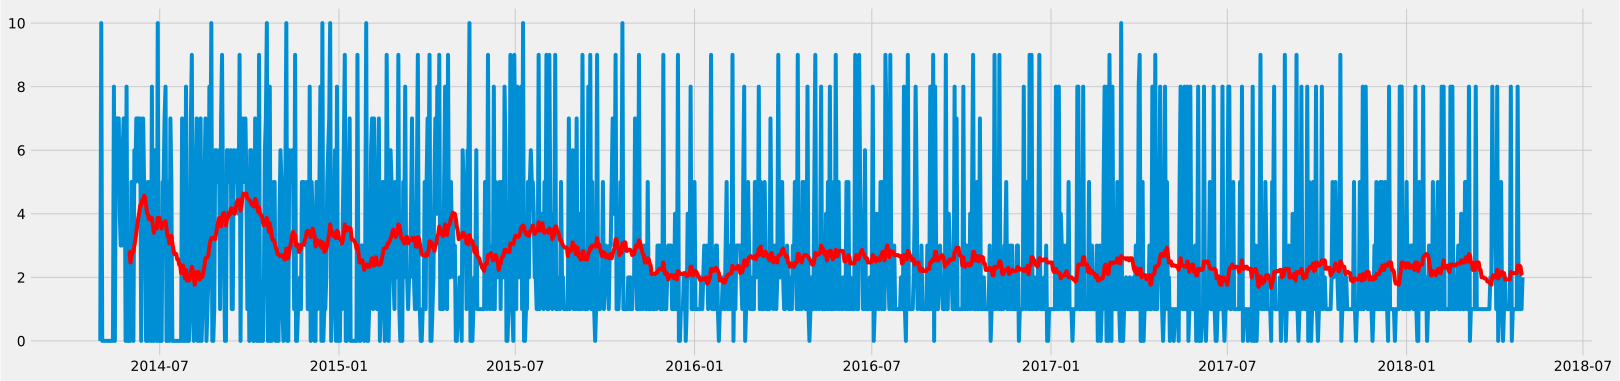

In [192]:
moving_avg = pd.core.window.Rolling(ts,30).mean()
plt.plot(ts)
plt.plot(moving_avg, color='red')

# Анализ скользящего среднего с интервалом в 30 дней

# Сильно понятнее не стало, но наметился нисходящий тренд между концом 2014-ого и началом 2016-ого, и относительно стабильное плато после